# Preprocessing des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("dataset_asthma.csv")
data.head()

,Hydroxyurea,ICS,LABA,Gender,Age,Height,Weight,BMI,R5Hz_PP,R20Hz_PP,X5Hz_PP,Fres_PP,Asthma
0,Non,Non,Non,Homme,11,128.9,25.8,15.5,7.36,3.91,-0.72,5.52,Asthmatique
1,Non,Non,Oui,Femme,33,164.0,56.1,20.9,1.61,2.29,-0.46,16.60,Normal
2,Non,Non,Oui,Femme,15,121.4,23.5,15.9,2.71,2.49,-0.47,10.52,Normal
3,Non,Non,Oui,Femme,37,154.5,60.9,25.5,5.18,3.58,-0.47,23.58,Asthmatique
4,Non,Non,Non,Homme,10,101.1,27.6,27.0,3.52,3.99,-0.35,15.46,Normal


In [3]:
data.columns

Index(['Hydroxyurea', 'ICS', 'LABA', 'Gender', 'Age', 'Height', 'Weight',
       'BMI', 'R5Hz_PP', 'R20Hz_PP', 'X5Hz_PP', 'Fres_PP', 'Asthma'],
      dtype='object')

In [4]:
# Check des doublons de valeurs
data.duplicated().value_counts()

False    1200
Name: count, dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.dtypes

Hydroxyurea     object
ICS             object
LABA            object
Gender          object
Age              int64
Height         float64
Weight         float64
BMI            float64
R5Hz_PP        float64
R20Hz_PP       float64
X5Hz_PP        float64
Fres_PP        float64
Asthma          object
dtype: object

In [7]:
data.isna().sum()

Hydroxyurea     0
ICS             0
LABA            0
Gender          0
Age             0
Height          0
Weight          0
BMI             0
R5Hz_PP        60
R20Hz_PP       60
X5Hz_PP        60
Fres_PP        60
Asthma          0
dtype: int64

In [8]:
# Remplacements des valeurs manquantes des quatre dernières colonnes par leurs moyennes respectives
cols_osc = ['R5Hz_PP', 'R20Hz_PP', 'X5Hz_PP', 'Fres_PP']
data[cols_osc] = (data[cols_osc].fillna(data[cols_osc].mean()).round(2))

In [9]:
data.isna().sum()

Hydroxyurea    0
ICS            0
LABA           0
Gender         0
Age            0
Height         0
Weight         0
BMI            0
R5Hz_PP        0
R20Hz_PP       0
X5Hz_PP        0
Fres_PP        0
Asthma         0
dtype: int64

In [10]:
data.Gender.unique()

array(['Homme', 'Femme'], dtype=object)

In [11]:
# Conversion des colonnes catégorielles en numériques
data['Hydroxyurea'] = data['Hydroxyurea'].map({'Oui': 1, 'Non': 0})
data['ICS'] = data['ICS'].map({'Oui': 1, 'Non': 0})
data['LABA'] = data['LABA'].map({'Oui': 1, 'Non': 0})

In [12]:
data.value_counts()

Hydroxyurea  ICS  LABA  Gender  Age  Height  Weight  BMI   R5Hz_PP  R20Hz_PP  X5Hz_PP  Fres_PP  Asthma     
0            0    0     Femme   5    109.2   9.9     8.3   7.13     3.27      -0.68    13.46    Asthmatique    1
                  1     Homme   25   167.7   74.3    26.4  2.57     2.55      -0.73    15.64    Normal         1
                                22   159.2   52.2    20.6  9.91     4.87      -0.86    19.97    Asthmatique    1
                                21   175.4   58.0    18.9  4.08     3.36      -0.21    16.82    Normal         1
                                     170.3   77.0    26.5  3.96     4.11      -0.65    9.36     Normal         1
                                                                                                              ..
                  0     Homme   18   165.9   87.0    31.6  3.48     3.16      -0.63    12.44    Normal         1
                                     162.3   73.6    27.9  5.91     2.72      -1.40    21.70    Asthm

In [13]:
data.head()

,Hydroxyurea,ICS,LABA,Gender,Age,Height,Weight,BMI,R5Hz_PP,R20Hz_PP,X5Hz_PP,Fres_PP,Asthma
0,0,0,0,Homme,11,128.9,25.8,15.5,7.36,3.91,-0.72,5.52,Asthmatique
1,0,0,1,Femme,33,164.0,56.1,20.9,1.61,2.29,-0.46,16.60,Normal
2,0,0,1,Femme,15,121.4,23.5,15.9,2.71,2.49,-0.47,10.52,Normal
3,0,0,1,Femme,37,154.5,60.9,25.5,5.18,3.58,-0.47,23.58,Asthmatique
4,0,0,0,Homme,10,101.1,27.6,27.0,3.52,3.99,-0.35,15.46,Normal


<Axes: >

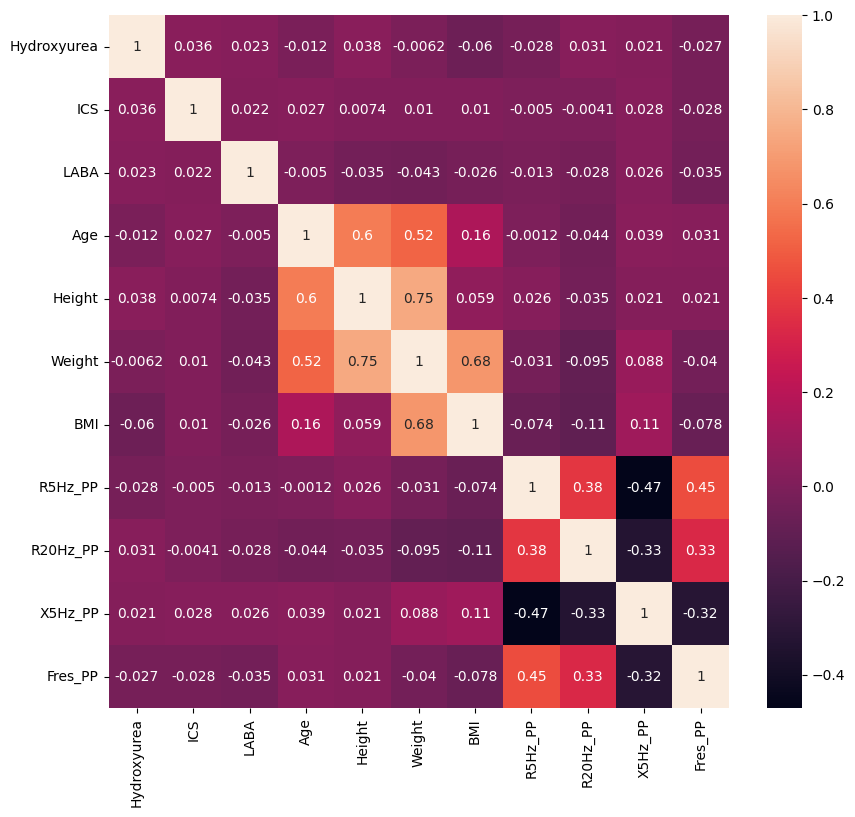

In [14]:
plt.figure(figsize=(10,9))
sns.heatmap(data.select_dtypes(include=["int64", "float64"]).corr(), annot=True)

C:\Users\SANTI\AppData\Local\Temp\ipykernel_696\3566764349.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='BMI', data=data, palette='muted')


<Axes: xlabel='Gender', ylabel='BMI'>

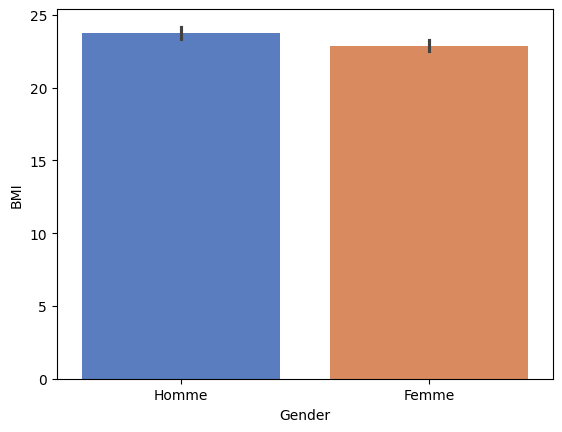

In [15]:
sns.barplot(x='Gender', y='BMI', data=data, palette='muted')

<Axes: xlabel='Weight'>

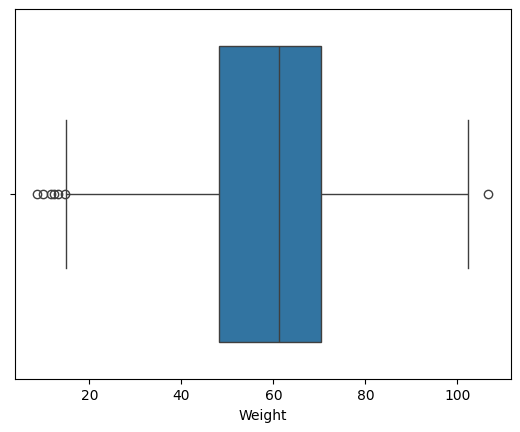

In [16]:
sns.boxplot(x='Weight', data=data)

In [17]:
#Traitement des outliers
# Fonction pour détecter et remplacer les valeurs aberrantes avec les Bounds
def replace_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:  # Only process numeric columns 
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [18]:
replace_outliers(data)

In [19]:
data.dtypes

Hydroxyurea    float64
ICS            float64
LABA           float64
Gender          object
Age            float64
Height         float64
Weight         float64
BMI            float64
R5Hz_PP        float64
R20Hz_PP       float64
X5Hz_PP        float64
Fres_PP        float64
Asthma          object
dtype: object

In [20]:
data['Age'] = data['Age'].astype('int64')

In [21]:
data.dtypes

Hydroxyurea    float64
ICS            float64
LABA           float64
Gender          object
Age              int64
Height         float64
Weight         float64
BMI            float64
R5Hz_PP        float64
R20Hz_PP       float64
X5Hz_PP        float64
Fres_PP        float64
Asthma          object
dtype: object

In [22]:
data.head()

,Hydroxyurea,ICS,LABA,Gender,Age,Height,Weight,BMI,R5Hz_PP,R20Hz_PP,X5Hz_PP,Fres_PP,Asthma
0,0.0,0.0,0.0,Homme,11,130.7375,25.8,15.5,7.36,3.91,-0.72,5.52,Asthmatique
1,0.0,0.0,0.0,Femme,33,164.0000,56.1,20.9,1.61,2.29,-0.46,16.60,Normal
2,0.0,0.0,0.0,Femme,15,130.7375,23.5,15.9,2.71,2.49,-0.47,10.52,Normal
3,0.0,0.0,0.0,Femme,37,154.5000,60.9,25.5,5.18,3.58,-0.47,23.58,Asthmatique
4,0.0,0.0,0.0,Homme,10,130.7375,27.6,27.0,3.52,3.99,-0.35,15.46,Normal


In [23]:
# Sauvegarde du dataset nettoyé
data.to_csv("dataset_asthma_Clean.csv", index=False)

# Modèle de Machine Learning (Random Forest Classifier)

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [25]:
# Encodage de la variable cible cut et de Gender, utilisation de LabelEncoder
# Cible : Asthmatique=1, Normal=0
data["New_Asthma"] = data["Asthma"].map({"Normal": 0, "Asthmatique": 1}).astype(int)

# (Option) Encodage binaire cohérent pour le sexe
data["Gender"] = data["Gender"].map({"Femme": 0, "Homme": 1}).astype(int)

# On peut maintenant supprimer l’ancienne colonne
data.drop(columns=["Asthma"], inplace=True)

# Vérifier le résultat
data.head()

,Hydroxyurea,ICS,LABA,Gender,Age,Height,Weight,BMI,R5Hz_PP,R20Hz_PP,X5Hz_PP,Fres_PP,New_Asthma
0,0.0,0.0,0.0,1,11,130.7375,25.8,15.5,7.36,3.91,-0.72,5.52,1
1,0.0,0.0,0.0,0,33,164.0000,56.1,20.9,1.61,2.29,-0.46,16.60,0
2,0.0,0.0,0.0,0,15,130.7375,23.5,15.9,2.71,2.49,-0.47,10.52,0
3,0.0,0.0,0.0,0,37,154.5000,60.9,25.5,5.18,3.58,-0.47,23.58,1
4,0.0,0.0,0.0,1,10,130.7375,27.6,27.0,3.52,3.99,-0.35,15.46,0


In [26]:
# Séparation des variables secondaires et de la variable cible
X = data.drop(columns=['New_Asthma'])
y = data['New_Asthma']

In [27]:
# Séparation du jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
categorical_features = ["Hydroxyurea", "ICS", "LABA", "Gender"]
numerical_features = ["Age", "Height", "Weight", "BMI", "R5Hz_PP", "R20Hz_PP", "X5Hz_PP", "Fres_PP"]

In [29]:
# Pipeline de preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

In [30]:
# Création du pipeline ML

ml_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [31]:
# Détermination des Hyperparamètres

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(ml_model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Height',
                                                                          'Weight',
                                                                          'BMI',
                                                                          'R5Hz_PP',
                                                                          'R20Hz_PP',
                                                                          'X5Hz_PP',
                                                                          'Fres_PP']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Hydroxyurea',
                                                                          'ICS',
                                                                          'LABA',
                                                                          'Gender'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 10, 15, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [32]:
print("Les meilleurs hyperparamètres sont :", grid_search.best_params_)

Les meilleurs hyperparamètres sont : {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


In [33]:
# Création du modèle final avec les hyperparamètres

ML_Model = grid_search.best_estimator_

In [34]:
# Entraînement du modèle
ML_Model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'BMI', 'R5Hz_PP', 'R20Hz_PP',
                                                   'X5Hz_PP', 'Fres_PP']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Hydroxyurea', 'ICS', 'LABA',
                                                   'Gender'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=2,
                                        min_samples_split=5,
                                        random_state=42))])

In [35]:
y_pred = ML_Model.predict(X_test)
y_proba = ML_Model.predict_proba(X_test)[:, 1]

In [36]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       143
           1       0.97      0.90      0.93        97

    accuracy                           0.95       240
   macro avg       0.95      0.94      0.94       240
weighted avg       0.95      0.95      0.95       240



In [37]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

ROC AUC Score: 0.9842837574796338


In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef
import pickle

In [39]:
# Binarisation pour AUC multiclass
# Binariser y_test pour le calcul de l'AUC multi-classe
classes = ML_Model.classes_  # ou np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Prédiction
y_pred = ML_Model.predict(X_test)
y_proba = ML_Model.predict_proba(X_test)

# Calcul des métriques
metrics = {
    "Modèle": ML_Model,
    "Meilleurs paramètres": grid_search.best_params_,
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred, average='macro'),
    "Precision": precision_score(y_test, y_pred, average='macro'),
    "F1-score": f1_score(y_test, y_pred, average='macro'),
    "Kappa": cohen_kappa_score(y_test, y_pred),
    "MCC": matthews_corrcoef(y_test, y_pred)
}

# Affichage des résultats
metrics

{'Modèle': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['Age', 'Height', 'Weight',
                                                    'BMI', 'R5Hz_PP', 'R20Hz_PP',
                                                    'X5Hz_PP', 'Fres_PP']),
                                                  ('cat',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                 

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       143
           1       0.97      0.90      0.93        97

    accuracy                           0.95       240
   macro avg       0.95      0.94      0.94       240
weighted avg       0.95      0.95      0.95       240

[[140   3]
 [ 10  87]]


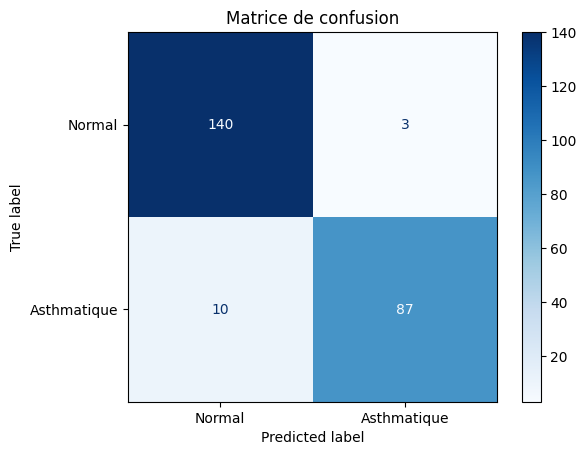

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = ML_Model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Asthmatique"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()

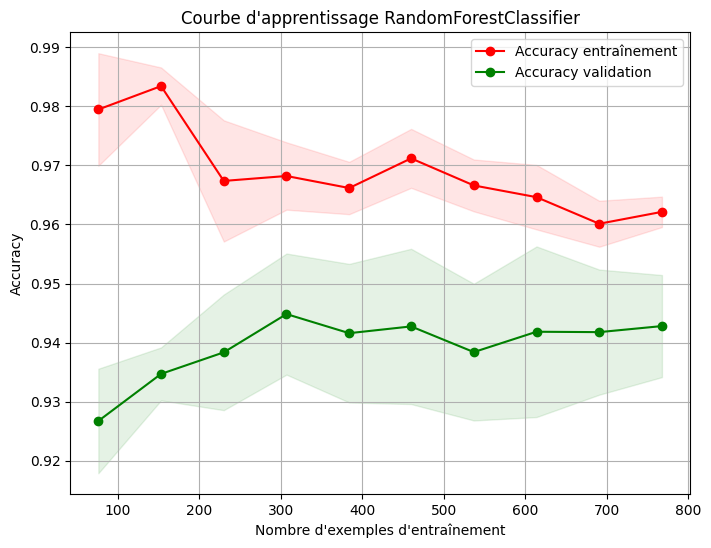

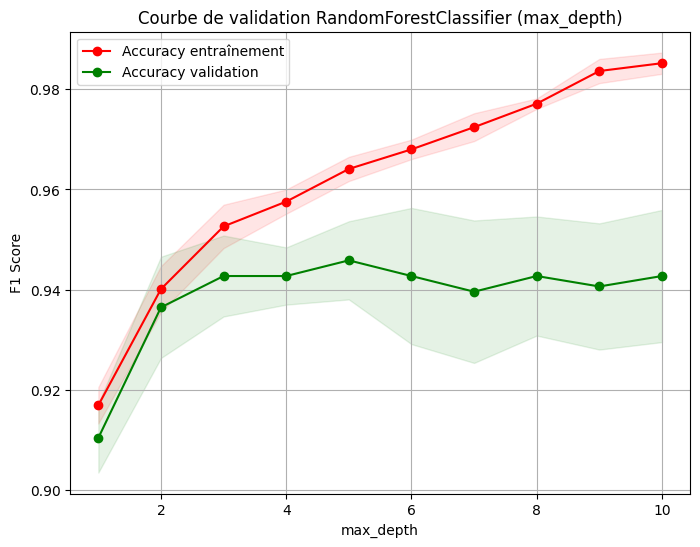

In [41]:
from sklearn.model_selection import learning_curve, validation_curve


# COURBE D'APPRENTISSAGE
train_sizes, train_scores, val_scores = learning_curve(
    ML_Model,
    X_train,
    y_train,
    cv=5,
    scoring='f1_macro',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Moyennes et écarts-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Accuracy entraînement")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(train_sizes, val_mean, 'o-', color="g", label="Accuracy validation")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")
plt.title("Courbe d'apprentissage RandomForestClassifier")
plt.xlabel("Nombre d'exemples d'entraînement")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()


# COURBE DE VALIDATION

# Exemple avec l'hyperparamètre max_depth

param_range = np.arange(1, 11)

train_scores, val_scores = validation_curve(
    ML_Model,
    X_train,
    y_train,
    param_name="classifier__max_depth",
    param_range=param_range,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Moyennes et écarts-types
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(param_range, train_mean, 'o-', color="r", label="Accuracy entraînement")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(param_range, val_mean, 'o-', color="g", label="Accuracy validation")
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.1, color="g")
plt.title("Courbe de validation RandomForestClassifier (max_depth)")
plt.xlabel("max_depth")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

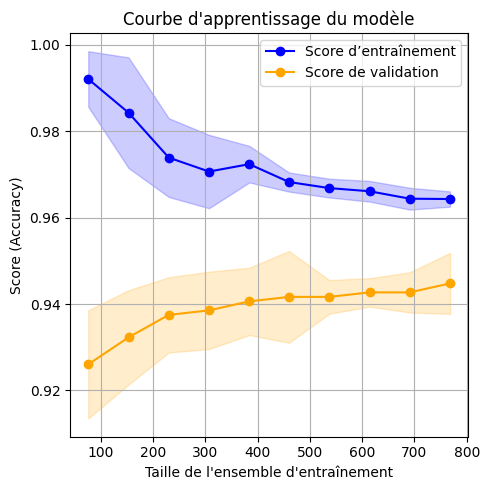

In [42]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


# Apprentissage & validation
train_sizes, train_scores, val_scores = learning_curve(
    ML_Model,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

# Moyenne et écart-type
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Affichage
plt.figure(figsize=(5, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Score d’entraînement')
plt.plot(train_sizes, val_scores_mean, 'o-', color='orange', label='Score de validation')

# Remplissage des zones d'écart-type
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2, color='blue')
plt.fill_between(train_sizes,
                 val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std,
                 alpha=0.2, color='orange')

plt.title("Courbe d'apprentissage du modèle")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score (Accuracy)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
# Validation croisée globale
cv_scores = cross_val_score(ML_Model, X, y, cv=5, scoring='accuracy')
print("Scores CV :", cv_scores)
print("Mean CV Accuracy :", cv_scores.mean())
print("Std CV Accuracy :", cv_scores.std())

Scores CV : [0.94583333 0.9375     0.92083333 0.975      0.95416667]
Mean CV Accuracy : 0.9466666666666667
Std CV Accuracy : 0.017950549357115025


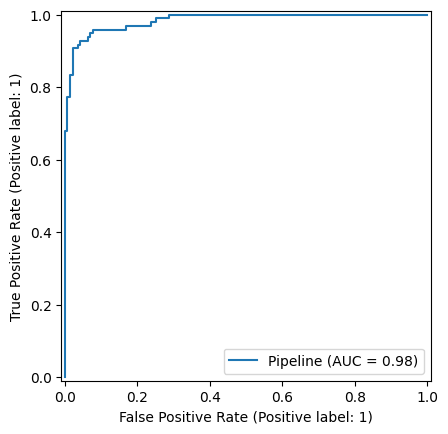

In [45]:
from sklearn.metrics import RocCurveDisplay
# Courbe ROC
RocCurveDisplay.from_estimator(ML_Model, X_test, y_test)
plt.show()

In [46]:
print("ROC AUC Score:", roc_auc_score(y_test, ML_Model.predict_proba(X_test)[:, 1]))

ROC AUC Score: 0.9842837574796338


In [47]:
# Sauvegarde du modèle avec pickle
import pickle
pickle.dump(ML_Model, open('ml_model_asthma.pkl', 'wb'))